In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
analysed_retail_data = pd.read_csv(r'..\Data\cleaned_customers_data.csv')
analysed_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99032 entries, 0 to 99031
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       99032 non-null  int64 
 1   company_id       99032 non-null  int64 
 2   address          99032 non-null  object
 3   total_spend      99032 non-null  int64 
 4   address_cleaned  99032 non-null  object
 5   address_lines    99032 non-null  int64 
 6   city             99032 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [3]:
analysed_retail_data.head()

,Unnamed: 0,company_id,address,total_spend,address_cleaned,address_lines,city
0,0,1,"APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...",5700,"APARTMENT 2,\n52 BEDFORD ROAD,\nLONDON,\nENGLA...",5,LONDON
1,1,2,"107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ",4700,"107 SHERINGHAM AVENUE,\nLONDON,\nN14 4UJ",3,LONDON
2,2,3,"43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...",5900,"43 SUNNINGDALE,\nYATE,\nBRISTOL,\nENGLAND,\nBS...",5,BRISTOL
3,3,4,"HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...",7200,"HAWESWATER HOUSE,\nLINGLEY MERE BUSINESS PARK,...",5,OTHER
4,4,5,"AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...",4600,"AMBERFIELD BARN HOUSE AMBER LANE,\nCHART SUTTO...",5,OTHER


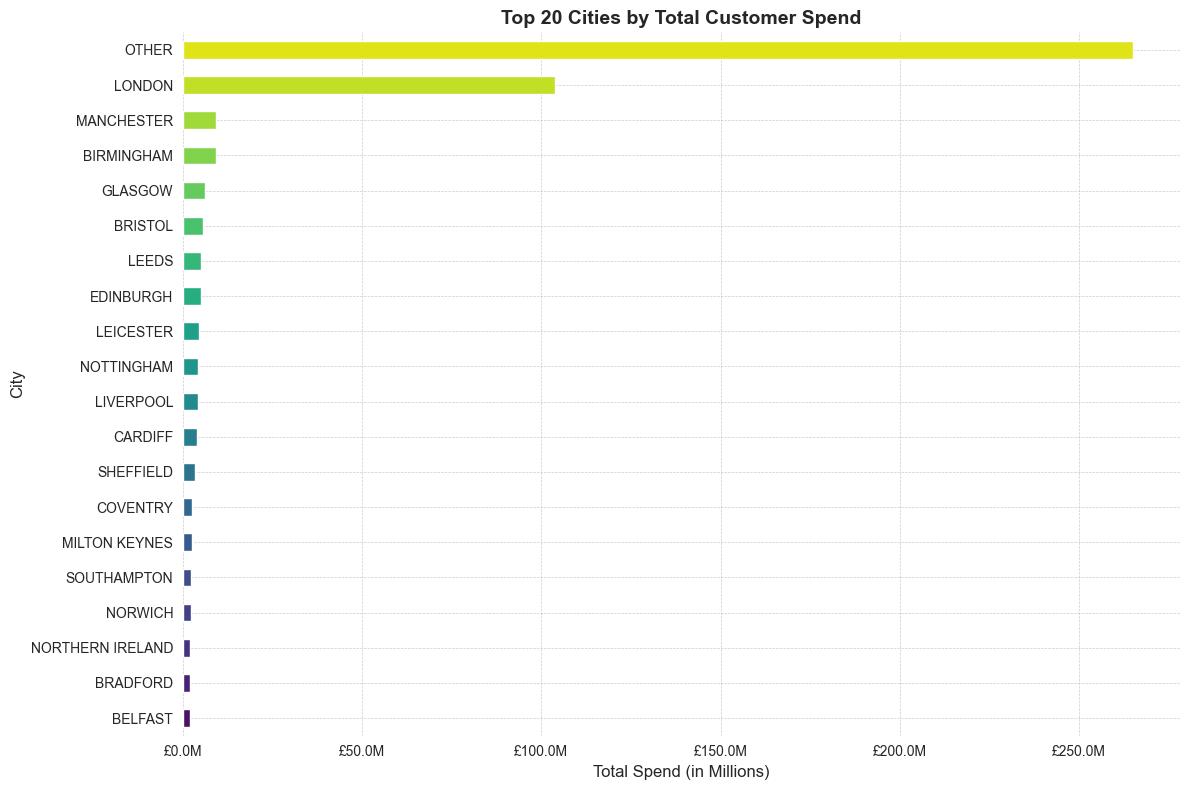

In [4]:
# Define a function to convert the spend to millions
def millions(x, pos):
    return '£%1.1fM' % (x * 1e-6)

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("muted")

# Plot the top 20 cities by spend
formatter = FuncFormatter(millions)
spend_by_city = analysed_retail_data.groupby('city')['total_spend'].sum().sort_values(ascending=False).head(20).sort_values(ascending=True)

fig, axis = plt.subplots(figsize=(12, 8))
# Convert the Seaborn color palette to a list of RGB tuples
color_list = sns.color_palette("viridis", len(spend_by_city)).as_hex()

# Use the updated list of colors in the barh() function
spend_by_city.plot.barh(ax=axis, color=color_list)


# Customize the plot
axis.xaxis.set_major_formatter(formatter)
axis.set(title="Total Customer Spend by City", xlabel="Total Spend", ylabel="City")
# axis.set_yticklabels(axis.get_yticklabels(), rotation=0, fontsize=10)
# axis.set_xticklabels(axis.get_xticks(), fontsize=10)
axis.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a title and labels with a larger font size
plt.title("Top 20 Cities by Total Customer Spend", fontsize=14, fontweight='bold')
plt.xlabel("Total Spend (in Millions)", fontsize=12)
plt.ylabel("City", fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

It is clear that the “Other” category dominates. As we have seen before, our customers are just as likely to be based outside of a major city. Another observation is that London does indeed come out as the top city in terms of customer spending, as well as the number of customers. The next largest cities in terms of spending, Manchester and Birmingham, are also the next largest by population.

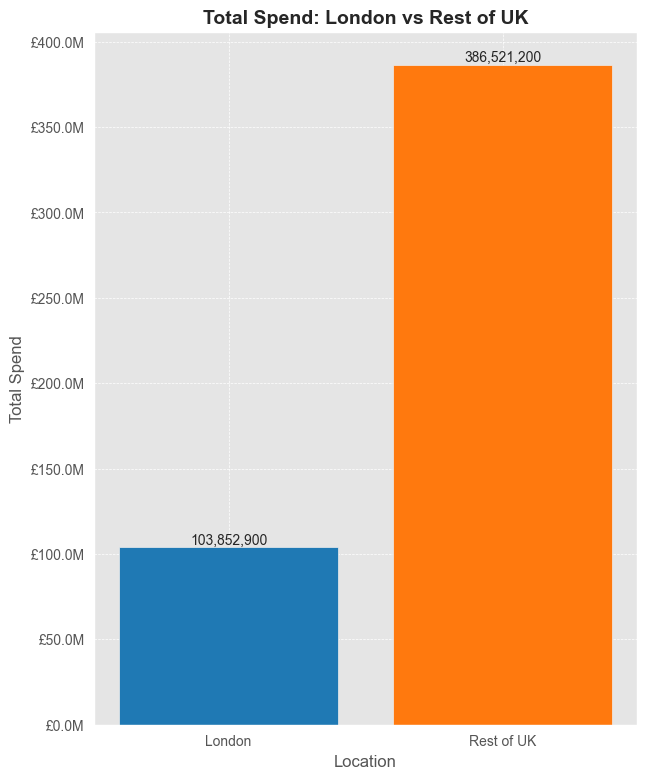

In [14]:
# Filter data for London and the rest of the UK
london_data = analysed_retail_data[analysed_retail_data['city'] == 'LONDON']
rest_of_uk_data = analysed_retail_data[analysed_retail_data['city'] != 'LONDON']

# Aggregate total spend
london_total_spend = london_data['total_spend'].sum()
rest_of_uk_total_spend = rest_of_uk_data['total_spend'].sum()

# Create a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Location': ['London', 'Rest of UK'],
    'Total Spend': [london_total_spend, rest_of_uk_total_spend]
})

# Create a formatter
formatter = FuncFormatter(millions)

# Plotting
plt.style.use('ggplot')  # Use an available style
fig, ax = plt.subplots(figsize=(7,9))

bars=ax.bar(comparison_df['Location'], comparison_df['Total Spend'], color=['#1f79b4', '#ff790e'])
# Annotate each bar with the exact value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom', fontsize=10)

ax.set_title('Total Spend: London vs Rest of UK', fontsize=14, fontweight='bold')
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Total Spend', fontsize=12)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(formatter)

# Add grid lines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.show()

## Key Findings

### Spending Concentration in Larger Cities
- **Higher Spending in Larger Cities**: Customers tend to spend more in larger cities, likely due to the higher concentration of customers in these areas.
- **Significant Outlier - London**: London generates nearly as much income as all other cities combined, underscoring its importance as a key market for your business.

### Data Limitations
- **Address Format Issues**: Not all addresses were in a format that allowed for accurate city extraction, potentially affecting the completeness and accuracy of the geographic analysis.
- **City List Limitations**: The use of the government’s list of cities may have excluded larger towns that could be of interest to stakeholders, leading to an underrepresentation of certain areas in the analysis.

## Recommendations

### Address Data Improvement
- Enhance address parsing methods or use additional data sources to improve city extraction accuracy. Consider geocoding services or machine learning models to handle complex address formats.

### Inclusion of Larger Towns
- Expand geographic analysis to include larger towns not classified as cities but still significant markets. This may involve creating a custom list of towns and cities based on business needs.

### Focus on London
- Given London's substantial contribution to income, develop strategies to further capitalize on this market, such as targeted marketing campaigns or expanding service offerings.

### Explore Regional Opportunities
- While London is a major market, explore opportunities in other large cities and towns to diversify income sources and reduce dependency on a single market.